In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder





In [ ]:
# Define dataset path
data_dir = '/content/drive/MyDrive/Plant_Dieases'
categories = os.listdir(data_dir)
print(categories)

#Load image and labels
image = []
labels = []

for category in categories:
  print(category)
  folder_path = os.path.join(data_dir, category)
  if os.path.isdir(folder_path): # Check if it is a directory
    for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)
      img = cv2.imread(img_path)
      if img is not None:
        img = cv2.resize(img, (64, 64))
        image.append(img)
        labels.append(category)

['Plant Dieases.ipynb', 'archive.zip', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']
Plant Dieases.ipynb
archive.zip
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
PlantVillage
Potato___healthy
Potato___Late_blight
Potato___Early_blight


In [ ]:
# Convert to numpy
x = np.array(image)
y = np.array(labels)

print("Labels:", np.unique(y))
print("Data shape:", x.shape)


Labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___healthy']
Data shape: (682, 64, 64, 3)


Class Distribution:
Potato___Early_blight            250
Potato___healthy                 152
Pepper__bell___Bacterial_spot    150
Pepper__bell___healthy           130
Name: count, dtype: int64


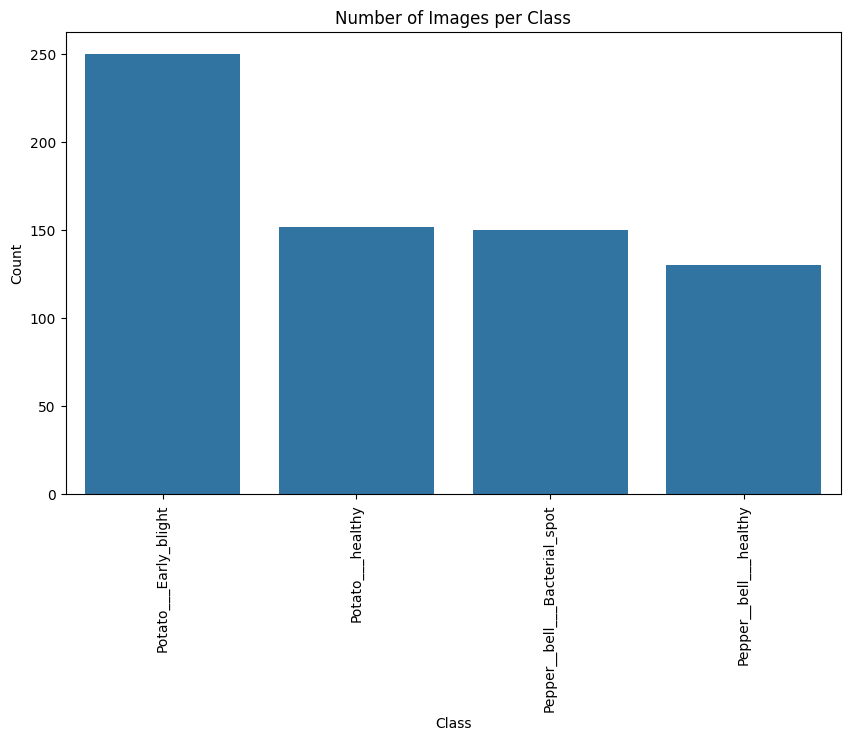

In [ ]:
# Count image per class
class_counts = pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

#plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



In [ ]:
# Remove corrupted image (if any)
valid_images = []
valid_labels = []

for img, label in zip(x, y):
  if img.shape == (64, 64, 3):
    valid_images.append(img)
    valid_labels.append(label)

x = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data Shape:", x.shape)






Cleaned Data Shape: (682, 64, 64, 3)


In [ ]:
# Encoded label
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded Labels:", y_encoded)

# Save class names for later use
class_names = le.classes_
print("Class Names:", class_names)



Encoded Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 

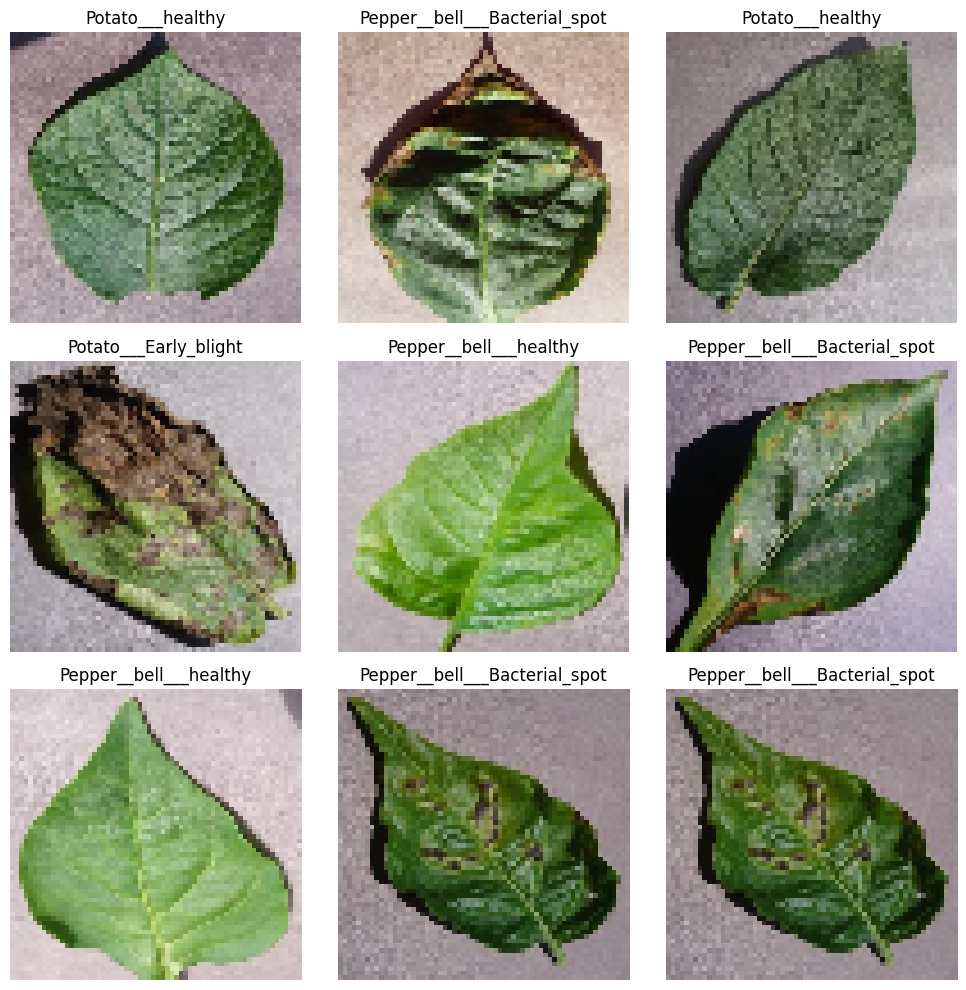

In [ ]:
# Show sample images
import random

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(x))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB))
    plt.title(class_names[y_encoded[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()





In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # Convert to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Extract features
hist_features =[extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)







In [ ]:
x_features

array([[0.00494639, 0.        , 0.00098928, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00152757, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00406059, 0.        , 0.00270706, ..., 0.        , 0.        ,
        0.        ],
       [0.01110521, 0.        , 0.00123391, ..., 0.        , 0.        ,
        0.        ],
       [0.00098982, 0.00494908, 0.00593889, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
# choose model
model = SVC(kernel='rbf', C=10, gamma='scale')

In [ ]:
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded, test_size=0.2, random_state=42)

# Train model
model.fit(x_train, y_train)

#Predict
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([3, 1, 1, 0, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 0, 1, 3, 1, 0, 2,
       3, 3, 3, 2, 3, 2, 0, 2, 3, 2, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 2, 1,
       3, 2, 1, 3, 2, 0, 0, 2, 3, 3, 3, 2, 0, 1, 2, 0, 0, 0, 2, 3, 2, 3,
       3, 0, 2, 0, 3, 3, 0, 1, 3, 0, 2, 0, 0, 1, 3, 0, 0, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 3, 1, 1, 2, 3, 3, 2, 1, 0,
       1, 3, 1, 2, 1, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 1, 2, 3, 0, 3, 2, 2,
       0, 0, 0, 1, 2])

Accuracy: 0.8832116788321168
F1 Score: 0.8822264908012123


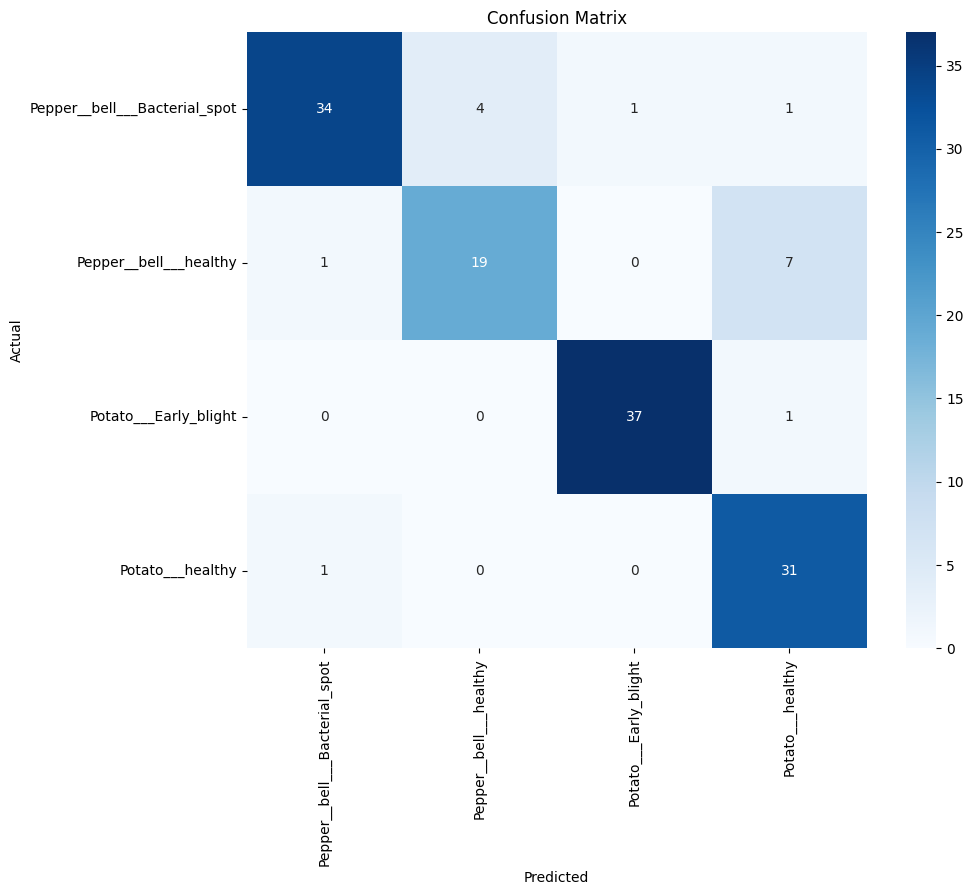

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, classification_report

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




